In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

from imblearn.over_sampling import ADASYN, SMOTE
from collections import Counter

Visualizacion

In [2]:
dataset = pd.read_csv('dataset/Stress-Lysis.csv',encoding='utf-8')
#etiquetas
print(dataset.columns.values.tolist())
#descripcion de datos
print(dataset.describe())
#verificamos valores nulos
print(dataset.isnull().sum(axis=0))

['Humidity', 'Temperature', 'Step count', 'Stress Level']
          Humidity  Temperature   Step count  Stress Level
count  2001.000000  2001.000000  2001.000000   2001.000000
mean     20.000000    89.000000   100.141429      1.104448
std       5.777833     5.777833    58.182948      0.771094
min      10.000000    79.000000     0.000000      0.000000
25%      15.000000    84.000000    50.000000      0.000000
50%      20.000000    89.000000   101.000000      1.000000
75%      25.000000    94.000000   150.000000      2.000000
max      30.000000    99.000000   200.000000      2.000000
Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64


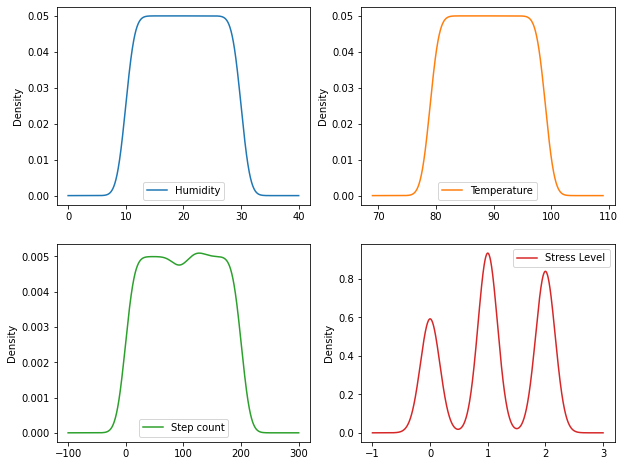

In [10]:
#dataset.hist(bins=10, figsize=(8,8))
dataset.plot(kind='density', subplots=True, layout=(2,2), sharex=False, figsize=(10,8))
plt.show()

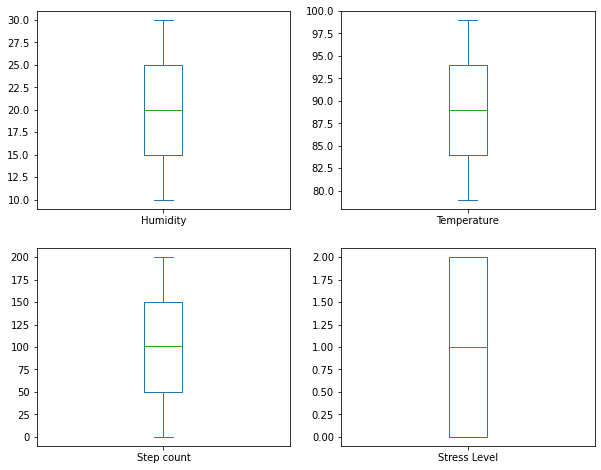

In [12]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False ,figsize=(10,8))
plt.show()

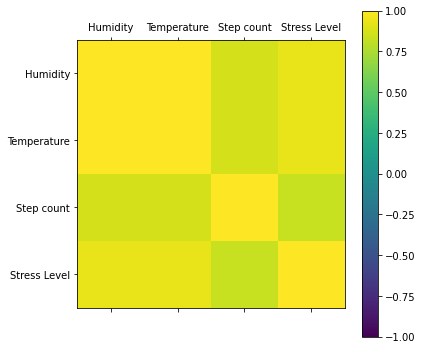

In [19]:
#correlacion
correlacion = dataset.corr(method='pearson')

# plotea la matriz de correlacion
feature_names = ['Humidity','Temperature','Step count','Stress Level']
fig = plt.figure(figsize=[6,6])  # crea una figura de 10 x 10
ax = fig.add_subplot(111) # añade una subfigura a la figura
cax = ax.matshow(correlacion, vmin=-1, vmax=1)  # computa la matriz de colores
fig.colorbar(cax) # añade barraa de escala de colores
ticks = np.arange(0,len(feature_names),1)  # genera  muescas para las filas y para las columnas
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(feature_names)  # setea las etiquetas de las columnas
ax.set_yticklabels(feature_names)  # setea las etiquetas de las filas
plt.show()  # muestra el plot

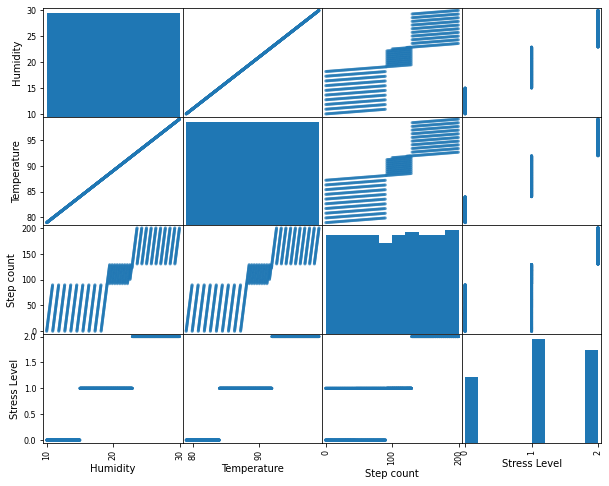

In [21]:
pd.plotting.scatter_matrix(dataset, figsize=[10,8])
plt.show()

In [3]:
# conteo de instancias por clase
dataset['Stress Level'].value_counts()

dataset_valores = dataset.values
X = dataset_valores[:,0:3]
Y = dataset_valores[:,3]

#oversampling de la clase minoritaria con SMOTE
sm = SMOTE(k_neighbors=5)
X_sm, Y_sm = sm.fit_resample(X,Y)
print('Distribucion de la variable target sobresampleada con SMOTE:', Counter(Y_sm) )

"""
#oversampling de la clase minoritaria con ADASYN
ada = ADASYN(n_neighbors=5)
X_ada, Y_ada = ada.fit_resample(X,Y)
print('Distribucion de la variable target sobresampleada con ADASYN:', Counter(Y_sm))
"""

Distribucion de la variable target sobresampleada con SMOTE: Counter({1.0: 790, 2.0: 790, 0.0: 790})


"\n#oversampling de la clase minoritaria con ADASYN\nada = ADASYN(n_neighbors=5)\nX_ada, Y_ada = ada.fit_resample(X,Y)\nprint('Distribucion de la variable target sobresampleada con ADASYN:', Counter(Y_sm))\n"

In [4]:
X_dataset = dataset.iloc[:,0:3].values
Y_dataset = dataset.iloc[:,3].values

Preprocesamiento

In [5]:
# ESCALAMIENTO
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_dataset)

In [8]:
# separamos un 75% train y 25% a test
x_train, x_test, y_train, y_test = train_test_split(X_scaler, Y_dataset, test_size=0.25, random_state=0)

x_train.shape,x_test.shape,y_train.shape, y_test.shape

((1500, 3), (501, 3), (1500,), (501,))

In [9]:
from sklearn.naive_bayes import GaussianNB   # para modelos Naive Bayes
from sklearn.linear_model import LogisticRegression # para usar modelos de regresion logistica  
from sklearn.tree import DecisionTreeClassifier     # para usar modelos de tipo arboles de decision
from sklearn.neighbors import KNeighborsClassifier  # para modelos  Knn 
from sklearn.svm import SVC   # para modelos SVM
from sklearn.model_selection import KFold  # para partir la data en k-folds
from sklearn.model_selection import cross_val_score   # para evaluar algoritmos en cross validacion 

# Definimos el pool de algoritmos de ML a evaluar
algoritmos = []
algoritmos.append(('LR', LogisticRegression(solver='liblinear')))  #genera logistic regresors con solver liblinear
algoritmos.append(('KNN', KNeighborsClassifier(n_neighbors=5))) #genera knn con 5 vecinos
algoritmos.append(('CART', DecisionTreeClassifier(max_depth=None))) # genera DT sin restriccion de profundidad
algoritmos.append(('SVM', SVC())) #genera SVMs con kernel radial (por default)

In [10]:
# Evaluamos cada algoritmo de ML en estrategia de 10-fold-CV
results = []
names = []


seed = 666   
kfold = KFold(n_splits=5, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

#  evalua cada algoritmo de ML
for algoname, algo in algoritmos:
    cv_results = cross_val_score(algo, x_train, y_train, cv=kfold, scoring='balanced_accuracy')
    results.append(cv_results)
    names.append(algoname)
    print("{}: {} ({})".format(algoname, cv_results.mean(), cv_results.std()))

LR: 0.9502203063020088 (0.008400641414717651)
KNN: 0.9982165343201501 (0.0024228300109553984)
CART: 0.9988281551152571 (0.0014375098970721074)
SVM: 0.99737265246361 (0.0023892641032756943)


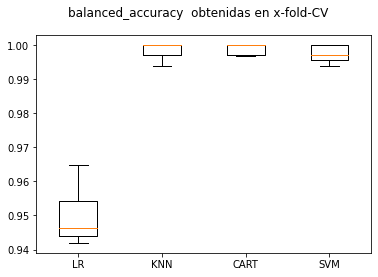

In [11]:
# Muestra graficamente los resultados de balanced_accuracy  en crossvalidacion de los Algoritmos evaluados
fig = plt.figure()
fig.suptitle('balanced_accuracy  obtenidas en x-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [12]:
from sklearn.metrics import balanced_accuracy_score   # para manejar metricas de desempeño 
from sklearn.metrics import classification_report  # para hacer reportes de resultados de clasificacion
from sklearn.metrics import confusion_matrix  # para manejar matrices de confusion

# Reentrena modelo LR con todos los datos de entrenamiento y lo prueba en el conjunto de validación
model = DecisionTreeClassifier(max_depth=None) #  usar class_weight = 'balanced') para entrenar tomando en cuenta el desbalance
model.fit(x_train, y_train)

# predice la c lase del conjunto de validacion
y_predicted = model.predict(x_test)
print("Balanced Accuracy score:", balanced_accuracy_score(y_test, y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_predicted))

# muestra un reporte de la clasificacion en validacion
print("\nReporte de clasificacion en conjunto de validacion: \n")
print(classification_report(y_test, y_predicted))

Balanced Accuracy score: 1.0

Matriz de Confusión:
[[114   0   0]
 [  0 213   0]
 [  0   0 174]]

Reporte de clasificacion en conjunto de validacion: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       213
           2       1.00      1.00      1.00       174

    accuracy                           1.00       501
   macro avg       1.00      1.00      1.00       501
weighted avg       1.00      1.00      1.00       501

